In [2]:
pip install tensorflow-text

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install --upgrade --no-cache-dir gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 4.5.4
    Uninstalling gdown-4.5.4:
      Successfully uninstalled gdown-4.5.4


In [1]:
import tensorflow_hub as hub

import pandas as pd

import tensorflow_text as text

import tensorflow as tf

import numpy as np

In [2]:
!gdown 1g0jBWp3HZ1QhYDnNynh0A_jUdhmagixW
!gdown 1-0q0JcBvsIcwwHVjWQ41a2yY_4XhM20u
!gdown 1JTq7EveehwEAw3SDNZsJLgVPE-dD0CXJ

Downloading...
From: https://drive.google.com/uc?id=1g0jBWp3HZ1QhYDnNynh0A_jUdhmagixW
To: c:\Users\KHOOSHRIN\Documents\BITS PILANI HYDERABAD CAMPUS\Third Year\First Semester\CS F429 - Natural Language Processing (NLP)\Project\NLP_train_with_bert_embeddings.csv

  0%|          | 0.00/348M [00:00<?, ?B/s]
  0%|          | 524k/348M [00:00<04:36, 1.26MB/s]
  0%|          | 1.05M/348M [00:00<02:32, 2.27MB/s]
  0%|          | 1.57M/348M [00:00<02:03, 2.81MB/s]
  1%|          | 2.62M/348M [00:00<01:26, 4.01MB/s]
  1%|          | 4.19M/348M [00:00<00:51, 6.65MB/s]
  2%|▏         | 5.77M/348M [00:01<00:39, 8.74MB/s]
  2%|▏         | 7.86M/348M [00:01<00:29, 11.7MB/s]
  3%|▎         | 10.5M/348M [00:01<00:22, 14.9MB/s]
  4%|▍         | 13.1M/348M [00:01<00:36, 9.23MB/s]
  5%|▍         | 16.8M/348M [00:01<00:25, 13.2MB/s]
  5%|▌         | 18.9M/348M [00:02<00:31, 10.6MB/s]
  6%|▌         | 20.4M/348M [00:02<00:37, 8.65MB/s]
  6%|▋         | 22.0M/348M [00:02<00:48, 6.78MB/s]
  7%|▋         | 25.

In [3]:
train = pd.read_csv("NLP_train_with_bert_embeddings.csv")
validate = pd.read_csv("NLP_validate_with_bert_embeddings.csv")
test = pd.read_csv("NLP_test_with_bert_embeddings.csv")

In [4]:
X_train = train['bert']
Y_train = train['verdict']

In [5]:
validate['verdict'] = validate['verdict'].apply(lambda x:1 if x=='spam' else 0)
test['verdict'] = test['verdict'].apply(lambda x:1 if x=='spam' else 0)

In [8]:
# downloading preprocessing files and model
bert_preprocessor = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')
bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')

In [9]:
text_input = tf.keras.layers.Input(shape = (), dtype = tf.string, name = 'Inputs')
preprocessed_text = bert_preprocessor(text_input)
embeed = bert_encoder(preprocessed_text)
dropout = tf.keras.layers.Dropout(0.1, name = 'Dropout')(embeed['pooled_output'])
outputs = tf.keras.layers.Dense(1, activation = 'sigmoid', name = 'Dense')(dropout)

In [10]:
# creating final model
model = tf.keras.Model(inputs = [text_input], outputs = [outputs])

In [11]:
Metrics = [tf.keras.metrics.BinaryAccuracy(name = 'accuracy'),
           tf.keras.metrics.Precision(name = 'precision'),
           tf.keras.metrics.Recall(name = 'recall')
           ]

In [12]:
# compiling our model
model.compile(optimizer ='adam',
               loss = 'binary_crossentropy',
               metrics = Metrics)

In [6]:
X_test=test['bert']
y_test=test['verdict']

In [7]:
float_train_embeddings=[]
for each_embedding in X_train:
  each_element=each_embedding.split()
  each_element[0]=each_element[0][1:]
  if len(each_element[0]) == 0:
    each_element.remove('')
  each_element[len(each_element)-1]=each_element[len(each_element)-1][0:len(each_element[len(each_element)-1])-1]
  float_each_element=[float(i) for i in each_element]
  float_train_embeddings.append(float_each_element)

In [8]:
X_train_final = np.array(float_train_embeddings)

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(384,)),
    tf.keras.layers.Dense(256, activation = 'sigmoid'),
    tf.keras.layers.Dense(128, activation = 'sigmoid'),
    tf.keras.layers.Dense(64, activation = 'sigmoid'),
    tf.keras.layers.Dense(32, activation = 'sigmoid'),
    tf.keras.layers.Dense(16, activation = 'sigmoid'),
    tf.keras.layers.Dense(8, activation = 'sigmoid'),
    tf.keras.layers.Dense(4, activation = 'sigmoid'),
    tf.keras.layers.Dense(2, activation = 'softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_final, Y_train, epochs=10)

Epoch 1/10
1080/1080 [==============================] - 3s 2ms/step - loss: 0.3670 - accuracy: 0.8636
Epoch 2/10
1080/1080 [==============================] - 2s 2ms/step - loss: 0.1095 - accuracy: 0.9747
Epoch 3/10
1080/1080 [==============================] - 2s 2ms/step - loss: 0.0727 - accuracy: 0.9794
Epoch 4/10
1080/1080 [==============================] - 3s 3ms/step - loss: 0.0629 - accuracy: 0.9808
Epoch 5/10
1080/1080 [==============================] - 4s 4ms/step - loss: 0.0566 - accuracy: 0.9822
Epoch 6/10
1080/1080 [==============================] - 3s 3ms/step - loss: 0.0521 - accuracy: 0.9829
Epoch 7/10
1080/1080 [==============================] - 2s 2ms/step - loss: 0.0493 - accuracy: 0.9834
Epoch 8/10
1080/1080 [==============================] - 3s 3ms/step - loss: 0.0477 - accuracy: 0.9836
Epoch 9/10
1080/1080 [==============================] - 3s 3ms/step - loss: 0.0449 - accuracy: 0.9842
Epoch 10/10
1080/1080 [==============================] - 2s 2ms/step - loss: 0.044

In [19]:
float_train_embeddings=[]
for each_embedding in X_test:
  each_element=each_embedding.split()
  each_element[0]=each_element[0][1:]
  if len(each_element[0]) == 0:
    each_element.remove('')
  each_element[len(each_element)-1]=each_element[len(each_element)-1][0:len(each_element[len(each_element)-1])-1]
  float_each_element=[float(i) for i in each_element]
  float_train_embeddings.append(float_each_element)

In [20]:
X_test_final = np.array(float_train_embeddings)

In [22]:
len(X_test_final[0])

384

In [23]:
model.evaluate(X_test_final,y_test)

168/168 [==============================] - 0s 1ms/step - loss: 0.0506 - accuracy: 0.9837


[0.0505717508494854, 0.9837352633476257]

In [24]:
y_pred = model.predict(X_test_final)

168/168 [==============================] - 0s 1ms/step


In [28]:
y_pred=y_pred.flatten()

In [50]:
final_y_pred=[]
ind = 0
for each_y_pred in y_pred:
    if ind%2==1 and each_y_pred<0.5:
        final_y_pred.append(0)
    elif ind%2==1:
        final_y_pred.append(1)
    ind += 1

In [54]:
from sklearn.metrics import confusion_matrix , classification_report

# creating confusion matrix 

cm = confusion_matrix(y_test,final_y_pred)

cm

array([[2460,   39],
       [  48, 2802]], dtype=int64)

Text(50.722222222222214, 0.5, 'Actual')

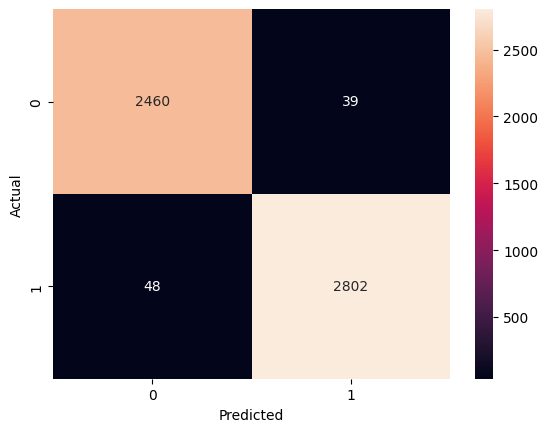

In [55]:
# plotting as a graph - importing seaborn
import seaborn as sns
from matplotlib import pyplot as plt
# creating a graph out of confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')